In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#Correlaciones
# ------------------------------------------------------------------------------
from itertools import combinations

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, chi2_contingency, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv("data/rrhh_elbueno.csv", index_col=0)
df.shape

(311, 29)

In [5]:
df.head()

,employee_name,empid,genderid,empstatusid,department,salary,termd,position,state,zip,date_of_birth,maritaldesc,citizendesc,hispaniclatino,racedesc,dateofhire,dateoftermination,termreason,employmentstatus,managername,managerid,recruitmentsource,performancescore,engagementsurvey,empsatisfaction,specialprojectscount,lastperformancereview_date,dayslatelast30,absences
0,"Adinolfi, Wilson K",10026,Masculine,1,Production,62506.0,No,Production Technician I,MA,1960,1983-07-10,Single,US Citizen,No,White,2011-07-05,NaN,Terminated,Active,Michael Albert,22.0,LinkedIn,Exceeds,4.60,Very Satisfied,0,2019-01-17,0,1
1,Unknown,10084,Masculine,5,IT/IS,104437.0,Yes,Sr. DBA,MA,2148,1975-05-05,Married,US Citizen,No,White,1900-01-01,2016-06-16,N/A-StillEmployed,Voluntarily Terminated,Simon Roup,4.0,Indeed,Fully Meets,4.96,Neutral,6,1900-01-01,999,17
2,"Akinkuolie, Sarah",10196,Femenine,5,Production,64955.0,Yes,Production Technician II,MA,1810,1988-09-19,Married,US Citizen,No,Unknown,1900-01-01,2012-09-24,hours,Voluntarily Terminated,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,Neutral,0,2012-05-15,999,3
3,"Alagbe,Trina",10088,Femenine,1,Production,64991.0,No,Production Technician I,MA,1886,1988-09-27,Married,US Citizen,No,Unknown,2008-01-07,NaN,Terminated,Active,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,Very Satisfied,0,2019-01-03,999,15
4,"Anderson, Carol",10069,Femenine,5,Production,50825.0,Yes,Production Technician I,MA,2169,1989-09-08,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Webster Butler,39.0,Google Search,Fully Meets,5.00,Satisfied,0,2016-02-01,0,2


In [6]:
p_value = shapiro(df['salary']).pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 1.1153312275049991e-23 )


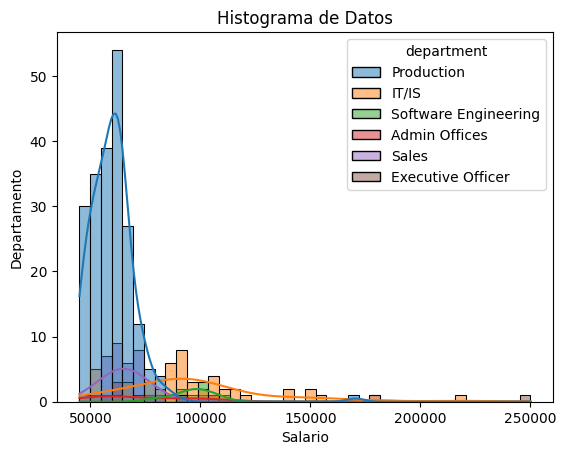

In [7]:
# Crear un histograma para visualizar la distribución
sns.histplot(x='salary', 
         hue='department',
         data=df,
         kde = True)
         
# ponemos título a la gráfica
plt.title('Histograma de Datos')

# cambiamos el nombre del eje x
plt.xlabel('Salario')

# cambiamos el nombre del eje y
plt.ylabel('Departamento');

In [8]:
#Vamos a ver relaciones entre las colunnas numéricas:
# definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns
numericas

Index(['empid', 'empstatusid', 'salary', 'zip', 'managerid',
       'engagementsurvey', 'specialprojectscount', 'dayslatelast30',
       'absences'],
      dtype='object')

In [9]:
numericas = ['salary', 'engagementsurvey', 'specialprojectscount', 'dayslatelast30', 'absences']

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
# Hemos creado una lista de tuplas con los resultados

In [10]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion
lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('salary', 'engagementsurvey'), ('salary', 'specialprojectscount'), ('salary', 'dayslatelast30'), ('salary', 'absences'), ('engagementsurvey', 'specialprojectscount'), ('engagementsurvey', 'dayslatelast30'), ('engagementsurvey', 'absences'), ('specialprojectscount', 'dayslatelast30'), ('specialprojectscount', 'absences'), ('dayslatelast30', 'absences')]


In [11]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df.corr(numeric_only = True, method = "spearman")
df_correlaciones

,empid,empstatusid,salary,zip,managerid,engagementsurvey,specialprojectscount,dayslatelast30,absences
empid,1.000000,0.070279,-0.090664,0.000972,0.098095,-0.575832,-0.021315,0.183307,-0.022735
empstatusid,0.070279,1.000000,-0.104373,-0.029460,0.140178,0.011427,-0.023491,-0.082260,0.084085
salary,-0.090664,-0.104373,1.000000,0.013084,-0.455582,0.031117,0.371031,0.035618,0.079194
zip,0.000972,-0.029460,0.013084,1.000000,0.120785,0.026454,-0.003064,0.055081,-0.005466
managerid,0.098095,0.140178,-0.455582,0.120785,1.000000,-0.019715,-0.406351,0.011339,0.091051
engagementsurvey,-0.575832,0.011427,0.031117,0.026454,-0.019715,1.000000,-0.005884,-0.161057,-0.006484
specialprojectscount,-0.021315,-0.023491,0.371031,-0.003064,-0.406351,-0.005884,1.000000,-0.023866,0.006738
dayslatelast30,0.183307,-0.082260,0.035618,0.055081,0.011339,-0.161057,-0.023866,1.000000,-0.028439
absences,-0.022735,0.084085,0.079194,-0.005466,0.091051,-0.006484,0.006738,-0.028439,1.000000


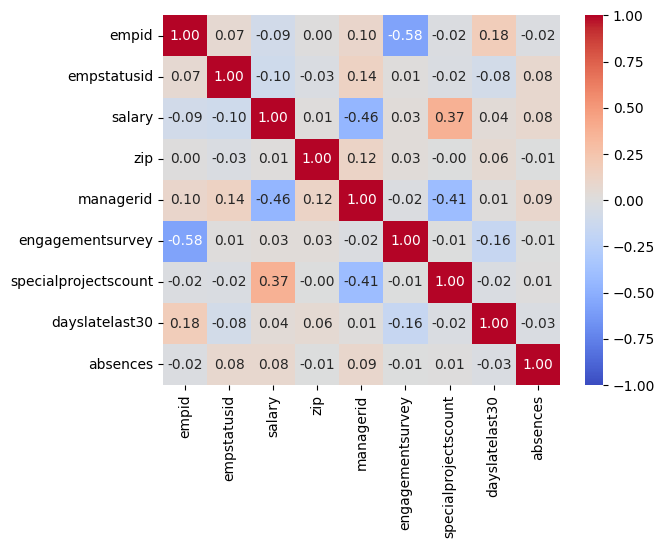

In [12]:
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "coolwarm", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

1. **Correlación Débil**:

   - El valor absoluto del coeficiente de correlación está cerca de 0.

   - Por lo general, se considera una correlación débil si el valor absoluto está por debajo de 0.3.

2. **Correlación Moderada**:

   - El valor absoluto del coeficiente de correlación está en el rango de 0.3 a 0.7.

   - Se considera una correlación moderada si el valor absoluto está en este rango.

3. **Correlación Fuerte**:

   - El valor absoluto del coeficiente de correlación es igual o superior a 0.7.

   - Se considera una correlación fuerte si el valor absoluto está en este rango.

## Correlaciones Moderadas: 
    
**NEGATIVAS:**
- engagementsurvey y empid --> Es el número de empleado, por lo que no nos interesa esta relación
- managerid y salary 
- managerid y specialprojectscount 

**POSITIVAS:**
- specialprojectscount y salary

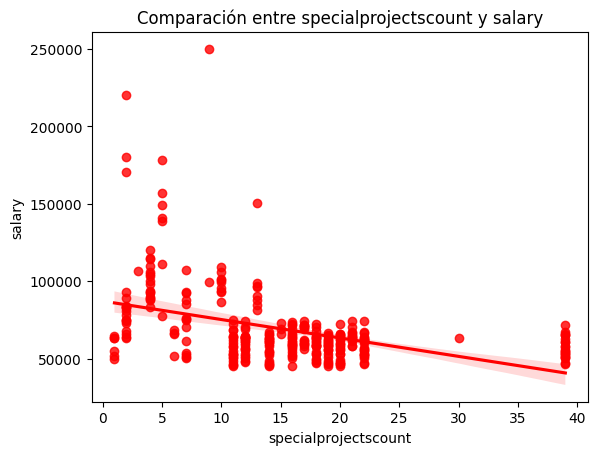

In [14]:
sns.regplot(x = "managerid", 
                y = "salary", 
                data = df, 
                color = "red")
plt.title('Comparación entre specialprojectscount y salary')
plt.xlabel('specialprojectscount')
plt.ylabel('salary')
plt.show()

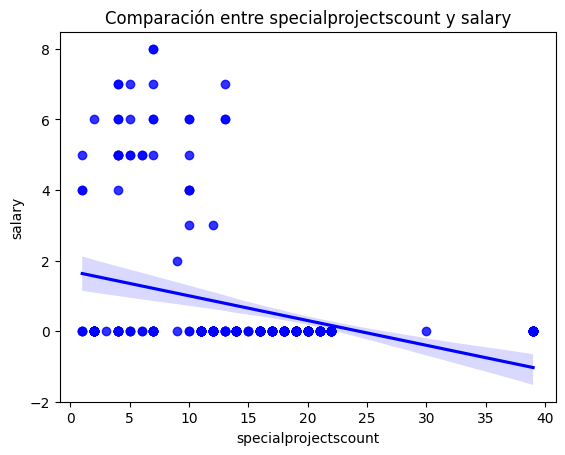

In [13]:
sns.regplot(x = "managerid", 
                y = "specialprojectscount", 
                data = df, 
                color = "blue")
plt.title('Comparación entre specialprojectscount y salary')
plt.xlabel('specialprojectscount')
plt.ylabel('salary')
plt.show()

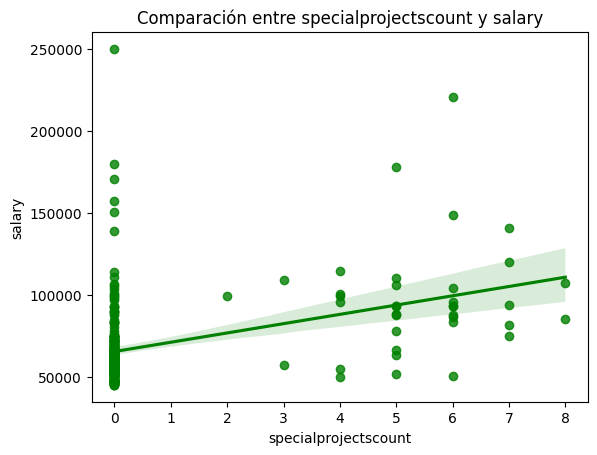

In [72]:
sns.regplot(x = "specialprojectscount", 
                y = "salary", 
                data = df, 
                color = "green")
plt.title('Comparación entre specialprojectscount y salary')
plt.xlabel('specialprojectscount')
plt.ylabel('salary')
plt.show()

In [20]:
# queremos analizar la distribución del deppartamento en nuestro conjunto de datos.
# calculamos la tabla de frecuencia absoluta
frecuencia_absoluta = df['department'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df['department'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Departamentos': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias

,Departamentos,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Production,208,66.881029
1,IT/IS,50,16.077170
2,Sales,32,10.289389
3,Software Engineering,10,3.215434
4,Admin Offices,10,3.215434
5,Executive Officer,1,0.321543


In [17]:
# queremos analizar la distribución del género en nuestro conjunto de datos.
# calculamos la tabla de frecuencia absoluta
frecuencia_absoluta = df['genderid'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df['genderid'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Género': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias

,Género,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Femenine,176,56.59164
1,Masculine,135,43.40836


In [22]:
# queremos analizar cómo se distribuye el departamento  en función del sexo.
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(df['genderid'], df['department'], normalize=True) * 100

# Interpretación: La tabla de contingencia muestra cuántos empleados pertenecen a cada combinación de ambas variables (nos muestra el %).
tabla_contingencia

department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering
genderid,,,,,,
Femenine,1.929260,0.321543,7.073955,40.514469,4.823151,1.929260
Masculine,1.286174,0.000000,9.003215,26.366559,5.466238,1.286174


In [18]:
# queremos analizar la distribución de los que se van en nuestro conjunto de datos.
# calculamos la tabla de frecuencia absoluta
frecuencia_absoluta = df['termd'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df['termd'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Salidas': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias

,Salidas,Frecuencia Absoluta,Frecuencia Relativa (%)
0,No,207,66.559486
1,Yes,104,33.440514


In [19]:
# queremos analizar cómo se distribuye el departamento  en función del sexo.
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(df['termd'], df['department'], normalize=True) * 100

# Interpretación: La tabla de contingencia muestra cuántos empleados pertenecen a cada combinación de ambas variables (nos muestra el %).
tabla_contingencia

department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering
termd,,,,,,
No,2.250804,0.321543,12.861736,40.192926,8.681672,2.250804
Yes,0.964630,0.000000,3.215434,26.688103,1.607717,0.964630


In [20]:
# vamos a definir una función para poder hacer el t-test de Student

def prueba_hipotesis(*args):
    
    # lo primero que tenemos que hacer es mirar si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]
    
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print(f"Con un p_valor de: {p_valor}")
        print("¡¡¡Rechazamos la hipótesis nula!!!")
        print("*** Hay una diferencia significativa entre los dos grupos. ***")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.")

H0: No hay diferencia en el promedio de personas que dejan la empresa por salario

H1: Sí la hay

In [21]:
# filtramos los datos para obtener dos grupos: salida de la empresa y sigue en ella
empleado = df[df['termd'] == 'No']["salary"]
ex_empleado = df[df['termd'] == 'Yes']["salary"]

# llamamos a la función que hemos creado
prueba_hipotesis(empleado, ex_empleado)


No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.


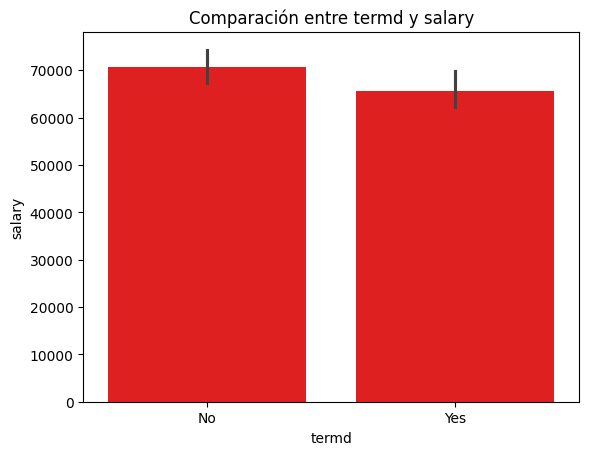

In [22]:
sns.barplot(x = "termd", 
                y = "salary", 
                data = df, 
                color = "red")
plt.title('Comparación entre termd y salary')
plt.xlabel('termd')
plt.ylabel('salary')
plt.show()

## No parece haber relación entre las personas que dejan o no la empresa y el salario

In [23]:
# Tabla de contingencia termd / department
pd.crosstab(index=df['termd'],
            columns=df['department'], margins=True)


department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering,All
termd,,,,,,,
No,7,1,40,125,27,7,207
Yes,3,0,10,83,5,3,104
All,10,1,50,208,32,10,311


In [24]:
# Tabla de contingencia % termd / department
pd.crosstab(index=df['termd'],
            columns=df['department'], margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering,All
termd,,,,,,,
No,2.250804,0.321543,12.861736,40.192926,8.681672,2.250804,66.559486
Yes,0.964630,0.000000,3.215434,26.688103,1.607717,0.964630,33.440514
All,3.215434,0.321543,16.077170,66.881029,10.289389,3.215434,100.000000


Tasa de proporcion de gente que deja la empresa

In [25]:
# Calcular la proporción de personas que dejan la empresa ('termd' = 'Yes')
df['termd'].value_counts()['Yes'] / len(df['termd'])

0.33440514469453375

In [26]:
# Crear un DataFrame con la cantidad de personas que se van por 'department'
departure_by_department = df[df['termd'] == 'Yes'].groupby('department').size().reset_index(name='departure_count')

print(departure_by_department)

             department  departure_count
0         Admin Offices                3
1                 IT/IS               10
2            Production               83
3                 Sales                5
4  Software Engineering                3


In [27]:
staying_by_department = df[df['termd'] == 'No'].groupby('department').size().reset_index(name='staying_count')

print(staying_by_department)

             department  staying_count
0         Admin Offices              7
1     Executive Officer              1
2                 IT/IS             40
3            Production            125
4                 Sales             27
5  Software Engineering              7


(0.0, 125.0)

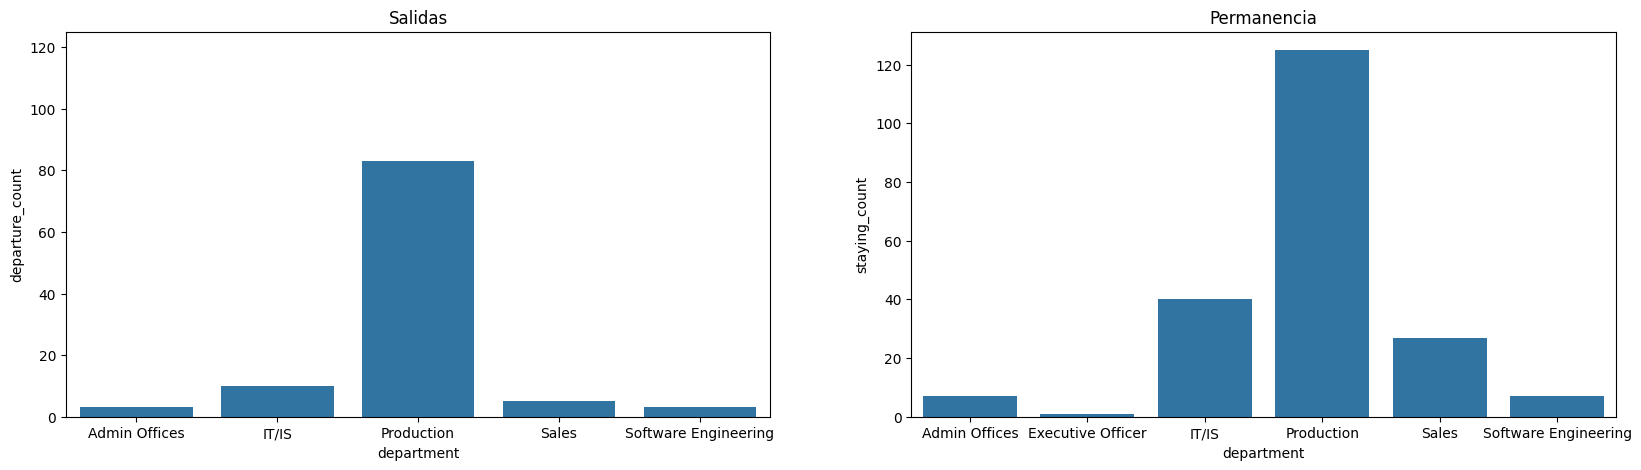

In [28]:
# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
# Gráfico 1: Salidas de la empresa
sns.barplot(x="department", y="departure_count", data=departure_by_department, ax=axes[0])
axes[0].set_title("Salidas")

# Gráfico 2: Permanencia
sns.barplot(x="department", y="staying_count", data=staying_by_department, ax=axes[1])
axes[1].set_title("Permanencia")
axes[0].set_ylim(0, max(staying_by_department['staying_count']))  # Establecer el rango del eje y

## Correlación por departamentos con salario

In [30]:
departamentos = df["department"].unique()

#Filtramos por departamentos, agrupamos en ex_empleado/empleado y comparamos con salario
for dep in departamentos:
    empleado = df[(df['termd'] == 'No') & (df['department'] == dep)]["salary"]
    ex_empleado = df[(df['termd'] == 'Yes') & (df['department'] == dep)]["salary"]

    # llamamos a la función que hemos creado
    print(f"Para el departamento {dep.upper()} vemos que:")
    prueba_hipotesis(empleado, ex_empleado)
    print("------------------------------------------------------")

Para el departamento PRODUCTION vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento IT/IS vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento SOFTWARE ENGINEERING vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento ADMIN OFFICES vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento SALES vemos que:
No podemos rechazar la hipótesis nula.

In [32]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

    

In [33]:
normalidad(df,'engagementsurvey')

Para la columna engagementsurvey los datos no siguen una distribución normal.


In [34]:
def prueba_mann_whitney(emp_no, emp_yes):
    if len(emp_no) == 0 or len(emp_yes) == 0:
        print("No hay datos suficientes para realizar la prueba de Mann-Whitney U.")
        return

    # Aplicar la prueba de Mann-Whitney U
    _, p_value = stats.mannwhitneyu(emp_no, emp_yes)

    # Imprimir los resultados
    if p_value < 0.05:
        print(p_value)
        print("Hay una diferencia significativa en las medianas.")
    else:
        print(p_value)
        print("No hay una diferencia significativa en las medianas.")

In [35]:
departamentos = df["department"].unique()

for dep in departamentos:
    empleado_no = df[(df['termd'] == 'No') & (df['department'] == dep)]["engagementsurvey"]
    empleado_yes = df[(df['termd'] == 'Yes') & (df['department'] == dep)]["engagementsurvey"]

    print(f"Para el departamento {dep.upper()}:")
    prueba_mann_whitney(empleado_no, empleado_yes)
    print("------------------------------------------------------")


Para el departamento PRODUCTION:
0.8705538903416186
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento IT/IS:
0.3813671664601166
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento SOFTWARE ENGINEERING:
0.6475057684266377
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento ADMIN OFFICES:
0.05993542764678846
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento SALES:
0.6027958728797822
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento EXECUTIVE OFFICER:
No hay datos suficientes para realizar la prueba de Mann-Whitney U.
------------------------------------------------------


## A/B testing --> Grupo control: Satisfechos / Grupo test: Insatisfechos


In [36]:
df["empsatisfaction"].unique()

array(['Very Satisfied', 'Neutral', 'Satisfied', 'Dissatisfied',
       'Very Dissatisfied'], dtype=object)

In [37]:
df_copy = df.copy()

In [70]:
grupo_control = df_copy[(df_copy["empsatisfaction"] == "Satisfied") & (df_copy["empsatisfaction"] == "Very Satisfied") & (df_copy["empsatisfaction"] == "Neutral")]
grupo_test = df_copy[(df_copy["empsatisfaction"] == "Dissatisfied") & (df_copy["empsatisfaction"] == "Very Dissatisfied")]

In [61]:
df_copy['grupo']=np.select([
        (df_copy['empsatisfaction'] == 'Satisfied') | (df_copy['empsatisfaction'] == 'Very Satisfied') | (df_copy['empsatisfaction'] == 'Neutral'),
        (df_copy['empsatisfaction'] == 'Very Dissatisfied') | (df_copy['empsatisfaction'] == 'Dissatisfied')
    ],
    ['control', 'test'],
    default='no_aplica')

In [40]:
df_copy["grupo"].value_counts()

grupo
control    300
test        11
Name: count, dtype: int64

In [41]:
# Tabla de contingencia termd / department
pd.crosstab(index=df_copy['grupo'],
            columns=df_copy['termd'])

termd,No,Yes
grupo,,
control,200,100
test,7,4


In [43]:
def prueba_chi2_contingencia(df, columna1, columna2):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df[columna1],df[columna2] )
    display(contingency_table)
    # Realizar la prueba de chi-cuadrado
    chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
    # Imprimir resultados de la prueba de chi-cuadrado
    print(f"Prueba de Chi-cuadrado - p-valor: {p_value_chi2}")
    # Realizar la prueba de proporciones (no es necesario hacerla dos veces)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    # Imprimir el resultado de la prueba
    alpha = 0.05
    if p_value < alpha:
        print("Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.")
    else:
        print("No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.")

In [44]:
prueba_chi2_contingencia(df_copy, 'grupo', 'termd')

termd,No,Yes
grupo,,
control,200,100
test,7,4


Prueba de Chi-cuadrado - p-valor: 1.0
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


termd,grupo,No,Yes
0,control,200,100
1,test,7,4


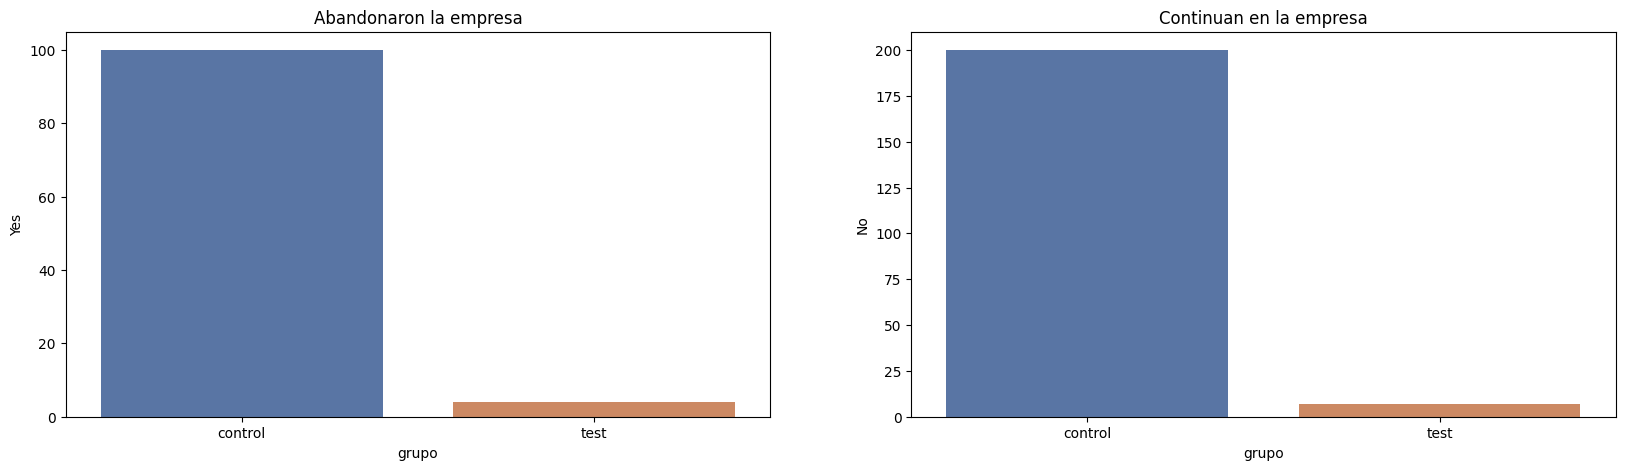


 ---------- 



In [45]:
# Visualizar los resultados
grafic_table=pd.crosstab(df_copy['grupo'],df_copy['termd']).reset_index()
display(grafic_table)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.barplot(x="grupo", y="Yes", data=grafic_table, palette="deep", ax=axes[0])
sns.barplot(x="grupo", y="No", data=grafic_table, palette="deep", ax=axes[1])
axes[0].set_title("Abandonaron la empresa")
axes[1].set_title("Continuan en la empresa")
# Mostrar la visualización
plt.show()
print("\n ---------- \n")

In [48]:
columnas = df_copy.columns
columnas

Index(['employee_name', 'empid', 'genderid', 'empstatusid', 'department',
       'salary', 'termd', 'position', 'state', 'zip', 'date_of_birth',
       'maritaldesc', 'citizendesc', 'hispaniclatino', 'racedesc',
       'dateofhire', 'dateoftermination', 'termreason', 'employmentstatus',
       'managername', 'managerid', 'recruitmentsource', 'performancescore',
       'engagementsurvey', 'empsatisfaction', 'specialprojectscount',
       'lastperformancereview_date', 'dayslatelast30', 'absences', 'grupo'],
      dtype='object')

In [51]:
columnas = ['genderid', 'empstatusid', 'department', 'position', 'state', 'zip', 'maritaldesc', 'citizendesc', 'hispaniclatino', 'racedesc', 'termreason', 'employmentstatus', 'managername', 'managerid', 'recruitmentsource', 'performancescore', 'empsatisfaction', 'specialprojectscount', 'dayslatelast30', 'absences']
for col in columnas:
    prueba_chi2_contingencia(df_copy, 'grupo', col)

genderid,Femenine,Masculine
grupo,,
control,170,130
test,6,5


Prueba de Chi-cuadrado - p-valor: 1.0
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


empstatusid,1,2,3,4,5
grupo,,,,,
control,177,11,14,13,85
test,7,0,0,1,3


Prueba de Chi-cuadrado - p-valor: 0.8278868066479902
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering
grupo,,,,,,
control,9,1,50,200,30,10
test,1,0,0,8,2,0


Prueba de Chi-cuadrado - p-valor: 0.5196565270040172
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


position,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Analyst,Data Analyst,Data Architect,Database Administrator,Director of Operations,Director of Sales,Enterprise Architect,IT Director,IT Manager - DB,IT Manager - Infra,IT Manager - Support,IT Support,Network Engineer,President & CEO,Principal Data Architect,Production Manager,Production Technician I,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
control,2,3,25,4,1,1,7,1,1,5,1,1,1,1,2,1,1,8,5,1,1,12,133,55,3,3,1,10,1,2,2,5
test,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,2,0,0,0,0,0,0,0,0


Prueba de Chi-cuadrado - p-valor: 0.9840728864476614
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


state,AL,AZ,CA,CO,CT,FL,GA,ID,IN,KY,MA,ME,MT,Ma,NC,ND,NH,NV,NY,OH,OR,PA,RI,TN,TX,UT,VA,VT,WA
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
control,1,1,1,1,6,1,1,1,1,1,265,1,1,2,1,1,1,0,1,1,1,1,1,1,3,1,1,2,0
test,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Prueba de Chi-cuadrado - p-valor: 0.0013304164716624845
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


zip,1013,1040,1420,1450,1460,1545,1550,1701,1721,1730,1731,1742,1749,1752,1760,1770,1773,1775,1776,1778,1801,1803,1810,1821,1824,1844,1845,1851,1864,1876,1880,1886,1887,1890,1901,1902,1905,1915,1938,1960,2021,2026,2027,2030,2031,2043,2044,2045,2048,2050,2056,2061,2062,2066,2067,2072,2081,2090,2093,2108,2109,2110,2119,2121,2122,2124,2125,2126,2127,2128,2129,2130,2132,2133,2134,2135,2136,2138,2140,2143,2145,2148,2149,2152,2154,2155,2169,2170,2171,2176,2180,2184,2189,2191,2199,2210,2301,2302,2324,2330,2343,2346,2351,2359,2360,2421,2445,2446,2451,2452,2453,2458,2459,2468,2472,2474,2478,2481,2492,2493,2703,2718,2747,2763,2908,3062,4063,5473,5664,6033,6040,6050,6070,6278,10171,19444,21851,27229,30428,33174,36006,37129,40220,43050,46204,58782,59102,78207,78230,78789,80820,83706,84111,85006,89139,90007,97756,98052
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
control,1,1,2,1,5,1,1,2,1,2,1,2,2,2,2,1,1,2,2,2,3,0,7,2,2,4,1,1,1,1,1,13,3,2,1,4,1,2,1,2,3,2,1,3,1,1,1,7,2,4,2,0,3,1,1,1,1,1,1,1,3,6,1,1,2,1,1,2,4,2,2,1,4,0,4,2,1,3,1,1,2,4,3,0,1,3,6,5,3,7,1,2,2,1,1,1,2,1,5,4,3,1,3,1,1,1,2,1,7,3,2,3,1,1,3,1,3,1,1,1,2,1,4,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
test,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Prueba de Chi-cuadrado - p-valor: 0.000899539227544594
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


maritaldesc,Divorced,Married,Separated,Single,Widowed
grupo,,,,,
control,29,119,11,133,8
test,1,5,1,4,0


Prueba de Chi-cuadrado - p-valor: 0.853138885256156
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


citizendesc,Eligible NonCitizen,Non-Citizen,US Citizen
grupo,,,
control,10,3,287
test,0,0,11


Prueba de Chi-cuadrado - p-valor: 0.7797901569412623
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


hispaniclatino,No,Yes
grupo,,
control,273,27
test,10,1


Prueba de Chi-cuadrado - p-valor: 1.0
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


racedesc,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Two or more races,Unknown,White
grupo,,,,,,,
control,2,18,59,8,9,76,128
test,0,2,1,0,0,1,7


Prueba de Chi-cuadrado - p-valor: 0.4270206815680849
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


termreason,Another position,Fatal attraction,Learned that he is a gangster,N/A-StillEmployed,Terminated,attendance,career change,gross misconduct,hours,maternity leave - did not return,medical issues,military,more money,"no-call, no-show",performance,relocation out of area,retiring,return to school,unhappy
grupo,,,,,,,,,,,,,,,,,,,
control,10,1,1,146,78,6,6,1,8,2,1,4,8,3,3,5,3,5,9
test,1,0,0,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


Prueba de Chi-cuadrado - p-valor: 0.8822290344361562
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


employmentstatus,Active,Terminated for Cause,Voluntarily Terminated
grupo,,,
control,200,15,85
test,7,1,3


Prueba de Chi-cuadrado - p-valor: 0.8335897037646003
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


managername,Alex Sweetwater,Amy Dunn,Board of Directors,Brandon R. LeBlanc,Brannon Miller,Brian Champaigne,David Stanley,Debra Houlihan,Elijiah Gray,Eric Dougall,Janet King,Jennifer Zamora,John Smith,Kelley Spirea,Ketsia Liebig,Kissy Sullivan,Lynn Daneault,Michael Albert,Peter Monroe,Simon Roup,Webster Butler
grupo,,,,,,,,,,,,,,,,,,,,,
control,9,20,2,6,19,8,21,3,22,4,17,7,13,22,21,21,12,21,14,17,21
test,0,1,0,1,3,0,0,0,0,0,2,0,1,0,0,1,1,1,0,0,0


Prueba de Chi-cuadrado - p-valor: 0.49902416313840814
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


managerid,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,30.0,39.0
grupo,,,,,,,,,,,,,,,,,,,,,,,
control,5,17,1,17,7,4,14,2,9,20,19,8,21,3,22,13,22,21,21,12,20,1,21
test,1,2,0,0,0,0,0,0,0,1,3,0,0,0,0,1,0,0,1,1,1,0,0


Prueba de Chi-cuadrado - p-valor: 0.5759161230527425
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


recruitmentsource,CareerBuilder,Diversity Job Fair,Employee Referral,Google Search,Indeed,LinkedIn,On-line Web application,Other,Website
grupo,,,,,,,,,
control,17,27,28,36,113,66,1,2,10
test,1,1,0,1,4,2,0,0,2


Prueba de Chi-cuadrado - p-valor: 0.47698152099019175
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


performancescore,Exceeds,Fully Meets,Needs Improvement,PIP
grupo,,,,
control,37,242,16,5
test,0,1,2,8


Prueba de Chi-cuadrado - p-valor: 4.7899836344634584e-30
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


empsatisfaction,Dissatisfied,Neutral,Satisfied,Very Dissatisfied,Very Satisfied
grupo,,,,,
control,0,108,94,0,98
test,9,0,0,2,0


Prueba de Chi-cuadrado - p-valor: 4.589045946099081e-66
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


specialprojectscount,0,2,3,4,5,6,7,8
grupo,,,,,,,,
control,263,1,2,6,11,10,5,2
test,11,0,0,0,0,0,0,0


Prueba de Chi-cuadrado - p-valor: 0.9808973112243213
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


dayslatelast30,0,2,3,4,5,6,999
grupo,,,,,,,
control,174,2,1,4,2,1,116
test,1,2,1,1,0,2,4


Prueba de Chi-cuadrado - p-valor: 1.6868024445614342e-15
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


absences,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
grupo,,,,,,,,,,,,,,,,,,,,
control,14,21,14,21,10,15,21,11,13,10,15,8,17,16,20,23,14,8,16,13
test,0,0,2,2,2,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1


Prueba de Chi-cuadrado - p-valor: 0.3657657537444748
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


## Hay relación entre la satisfacción, la implicación, el desempeño y los días que llegan tarde al trabajo.

## -----------------------------------------------------------------------------------------

## Grupo control --> Los que se quedan
## Grupo test --> Los que se van

In [56]:
grupo_control = df_copy[(df_copy["termd"] == "No")]
grupo_test = df_copy[(df_copy["termd"] == "Yes")]
df_copy['salida']=np.select([
        (df_copy['termd'] == 'No'),
        (df_copy['termd'] == 'Yes')
    ],
    ['control', 'test'],
    default='no_aplica')

In [57]:
columnas = ['genderid', 'empsatisfaction', 'empstatusid', 'department', 'position', 'state', 'zip', 'maritaldesc', 'citizendesc', 'hispaniclatino', 'racedesc', 'termreason', 'employmentstatus', 'managername', 'managerid', 'recruitmentsource', 'performancescore', 'empsatisfaction', 'specialprojectscount', 'dayslatelast30', 'absences']
for col in columnas:
    prueba_chi2_contingencia(df_copy, 'salida', col)

genderid,Femenine,Masculine
salida,,
control,116,91
test,60,44


Prueba de Chi-cuadrado - p-valor: 0.875765197827543
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


empsatisfaction,Dissatisfied,Neutral,Satisfied,Very Dissatisfied,Very Satisfied
salida,,,,,
control,5,75,56,2,69
test,4,33,38,0,29


Prueba de Chi-cuadrado - p-valor: 0.32958679603086466
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


empstatusid,1,2,3,4,5
salida,,,,,
control,182,11,14,0,0
test,2,0,0,14,88


Prueba de Chi-cuadrado - p-valor: 3.794908670592278e-64
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering
salida,,,,,,
control,7,1,40,125,27,7
test,3,0,10,83,5,3


Prueba de Chi-cuadrado - p-valor: 0.022156353215508472
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


position,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Analyst,Data Analyst,Data Architect,Database Administrator,Director of Operations,Director of Sales,Enterprise Architect,IT Director,IT Manager - DB,IT Manager - Infra,IT Manager - Support,IT Support,Network Engineer,President & CEO,Principal Data Architect,Production Manager,Production Technician I,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer
salida,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
control,3,1,23,4,1,1,6,0,1,2,1,1,0,1,1,1,1,8,4,1,0,9,85,31,2,3,1,6,1,2,1,5
test,0,2,4,0,0,0,1,1,0,3,0,0,1,0,1,0,0,0,1,0,1,5,52,26,1,0,0,4,0,0,1,0


Prueba de Chi-cuadrado - p-valor: 0.16192288171736013
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


state,AL,AZ,CA,CO,CT,FL,GA,ID,IN,KY,MA,ME,MT,Ma,NC,ND,NH,NV,NY,OH,OR,PA,RI,TN,TX,UT,VA,VT,WA
salida,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
control,1,1,1,1,5,1,1,1,1,1,176,1,1,1,1,1,1,1,1,0,1,0,1,0,3,1,0,2,1
test,0,0,0,0,1,0,0,0,0,0,98,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


Prueba de Chi-cuadrado - p-valor: 0.772290024610792
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


zip,1013,1040,1420,1450,1460,1545,1550,1701,1721,1730,1731,1742,1749,1752,1760,1770,1773,1775,1776,1778,1801,1803,1810,1821,1824,1844,1845,1851,1864,1876,1880,1886,1887,1890,1901,1902,1905,1915,1938,1960,2021,2026,2027,2030,2031,2043,2044,2045,2048,2050,2056,2061,2062,2066,2067,2072,2081,2090,2093,2108,2109,2110,2119,2121,2122,2124,2125,2126,2127,2128,2129,2130,2132,2133,2134,2135,2136,2138,2140,2143,2145,2148,2149,2152,2154,2155,2169,2170,2171,2176,2180,2184,2189,2191,2199,2210,2301,2302,2324,2330,2343,2346,2351,2359,2360,2421,2445,2446,2451,2452,2453,2458,2459,2468,2472,2474,2478,2481,2492,2493,2703,2718,2747,2763,2908,3062,4063,5473,5664,6033,6040,6050,6070,6278,10171,19444,21851,27229,30428,33174,36006,37129,40220,43050,46204,58782,59102,78207,78230,78789,80820,83706,84111,85006,89139,90007,97756,98052
salida,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
control,1,1,0,2,4,1,1,1,1,2,1,0,1,1,1,1,1,1,2,1,2,1,4,2,2,1,1,0,1,0,0,11,2,1,0,2,1,1,0,1,2,1,1,1,1,1,1,5,2,3,2,1,1,0,1,1,1,0,2,1,2,5,1,1,1,1,1,1,2,1,0,1,4,1,4,2,1,2,1,0,2,2,3,0,1,2,4,2,2,2,1,2,2,1,1,0,2,1,3,2,1,1,2,0,1,0,0,0,5,2,2,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
test,0,0,2,0,1,0,0,1,0,0,0,2,1,1,1,0,0,1,0,1,1,0,3,0,0,3,0,1,0,1,1,2,1,1,1,2,0,1,1,1,1,1,0,2,0,0,0,2,0,1,0,0,2,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,2,2,2,0,0,0,0,0,0,1,0,1,0,2,0,1,0,1,2,3,1,5,0,0,0,0,0,1,0,0,2,2,2,0,1,1,0,1,2,1,2,1,0,3,0,0,3,1,2,0,1,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Prueba de Chi-cuadrado - p-valor: 0.7609707433354373
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


maritaldesc,Divorced,Married,Separated,Single,Widowed
salida,,,,,
control,14,77,11,101,4
test,16,47,1,36,4


Prueba de Chi-cuadrado - p-valor: 0.0073410113058788575
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


citizendesc,Eligible NonCitizen,Non-Citizen,US Citizen
salida,,,
control,5,1,201
test,5,2,97


Prueba de Chi-cuadrado - p-valor: 0.2434024429359431
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


hispaniclatino,No,Yes
salida,,
control,188,19
test,95,9


Prueba de Chi-cuadrado - p-valor: 1.0
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


racedesc,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Two or more races,Unknown,White
salida,,,,,,,
control,2,12,35,5,7,52,94
test,0,8,25,3,2,25,41


Prueba de Chi-cuadrado - p-valor: 0.6243005917154154
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


termreason,Another position,Fatal attraction,Learned that he is a gangster,N/A-StillEmployed,Terminated,attendance,career change,gross misconduct,hours,maternity leave - did not return,medical issues,military,more money,"no-call, no-show",performance,relocation out of area,retiring,return to school,unhappy
salida,,,,,,,,,,,,,,,,,,,
control,0,0,0,128,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test,11,1,1,25,0,6,6,1,8,2,1,4,8,3,4,5,3,5,10


Prueba de Chi-cuadrado - p-valor: 3.8305623224643695e-36
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


employmentstatus,Active,Terminated for Cause,Voluntarily Terminated
salida,,,
control,207,0,0
test,0,16,88


Prueba de Chi-cuadrado - p-valor: 2.9322977291366974e-68
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


managername,Alex Sweetwater,Amy Dunn,Board of Directors,Brandon R. LeBlanc,Brannon Miller,Brian Champaigne,David Stanley,Debra Houlihan,Elijiah Gray,Eric Dougall,Janet King,Jennifer Zamora,John Smith,Kelley Spirea,Ketsia Liebig,Kissy Sullivan,Lynn Daneault,Michael Albert,Peter Monroe,Simon Roup,Webster Butler
salida,,,,,,,,,,,,,,,,,,,,,
control,6,8,2,5,16,8,15,2,14,4,13,6,11,16,16,10,12,13,13,9,8
test,3,13,0,2,6,0,6,1,8,0,6,1,3,6,5,12,1,9,1,8,13


Prueba de Chi-cuadrado - p-valor: 0.0037078817999734977
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


managerid,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,30.0,39.0
salida,,,,,,,,,,,,,,,,,,,,,,,
control,4,13,1,9,6,4,13,2,6,8,16,8,15,2,14,11,16,16,10,12,13,0,8
test,2,6,0,8,1,0,1,0,3,13,6,0,6,1,8,3,6,5,12,1,8,1,13


Prueba de Chi-cuadrado - p-valor: 0.00460391576832335
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


recruitmentsource,CareerBuilder,Diversity Job Fair,Employee Referral,Google Search,Indeed,LinkedIn,On-line Web application,Other,Website
salida,,,,,,,,,
control,9,13,23,14,83,53,0,1,11
test,9,15,5,23,34,15,1,1,1


Prueba de Chi-cuadrado - p-valor: 3.0505860193269113e-05
Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


performancescore,Exceeds,Fully Meets,Needs Improvement,PIP
salida,,,,
control,29,162,8,8
test,8,81,10,5


Prueba de Chi-cuadrado - p-valor: 0.0926382159683332
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


empsatisfaction,Dissatisfied,Neutral,Satisfied,Very Dissatisfied,Very Satisfied
salida,,,,,
control,5,75,56,2,69
test,4,33,38,0,29


Prueba de Chi-cuadrado - p-valor: 0.32958679603086466
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


specialprojectscount,0,2,3,4,5,6,7,8
salida,,,,,,,,
control,182,1,1,1,8,8,4,2
test,92,0,1,5,3,2,1,0


Prueba de Chi-cuadrado - p-valor: 0.19596205196776117
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


dayslatelast30,0,2,3,4,5,6,999
salida,,,,,,,
control,114,4,2,2,0,1,84
test,61,0,0,3,2,2,36


Prueba de Chi-cuadrado - p-valor: 0.09267689890052207
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


absences,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
salida,,,,,,,,,,,,,,,,,,,,
control,11,15,12,18,8,9,14,8,8,6,10,5,13,14,13,12,8,5,10,8
test,3,6,4,5,4,7,7,3,6,4,5,3,4,3,7,11,7,3,6,6


Prueba de Chi-cuadrado - p-valor: 0.9039182172382234
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.


## Hay relación entre el empstatusid, el departmento, el estado civil, el la razón de abandono, el employmentstatus, el manager y con la fuente de reclutamiento.

## ENGAGEMENTSURVEY


## Satisfechos o no y engagementsurvey

In [72]:
normalidad(df_copy, "engagementsurvey")


Para la columna engagementsurvey los datos no siguen una distribución normal.


In [73]:
control = df_copy[(df_copy['empsatisfaction'] == 'Satisfied') | (df_copy['empsatisfaction'] == 'Very Satisfied') | (df_copy['empsatisfaction'] == 'Neutral')]["engagementsurvey"]
test = df_copy[(df_copy['empsatisfaction'] == 'Very Dissatisfied') | (df_copy['empsatisfaction'] == 'Dissatisfied')]["engagementsurvey"]

# llamamos a la función que hemos creado

prueba_mann_whitney(control, test)
print("------------------------------------------------------")

2.2992757892205624e-05
Hay una diferencia significativa en las medianas.
------------------------------------------------------


In [67]:
control = df_copy[(df_copy['empsatisfaction'] == 'Satisfied') | (df_copy['empsatisfaction'] == 'Very Satisfied') | (df_copy['empsatisfaction'] == 'Neutral')]["salary"]
test = df_copy[(df_copy['empsatisfaction'] == 'Very Dissatisfied') | (df_copy['empsatisfaction'] == 'Dissatisfied')]["salary"]

# llamamos a la función que hemos creado

prueba_mann_whitney(control, test)
print("------------------------------------------------------")

0.2034817166459394
No hay una diferencia significativa en las medianas.
------------------------------------------------------


In [68]:
#ex_empleado/empleado y comparamos con la implicacion

control = df_copy[(df_copy['termd'] == 'Yes')]["engagementsurvey"]
test = df_copy[(df_copy['termd'] == 'No')]["engagementsurvey"]

# llamamos a la función que hemos creado

prueba_mann_whitney(control, test)
print("------------------------------------------------------")

0.8853700867889773
No hay una diferencia significativa en las medianas.
------------------------------------------------------


In [69]:

#ex_empleado/empleado y comparamos con la salario

control = df_copy[(df_copy['termd'] == 'Yes')]["salary"]
test = df_copy[(df_copy['termd'] == 'No')]["salary"]

# llamamos a la función que hemos creado

prueba_mann_whitney(control, test)
print("------------------------------------------------------")

0.09716428599206857
No hay una diferencia significativa en las medianas.
------------------------------------------------------


In [253]:
# Crear tabla de contingencia
contingency_table = pd.crosstab( df_copy['salida'],df_copy['empsatisfaction'] )
display(contingency_table)
# Realizar la prueba de chi-cuadrado
chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
# Imprimir resultados de la prueba de chi-cuadrado
print(f"Prueba de Chi-cuadrado - p-valor: {p_value_chi2}")
# Realizar la prueba de proporciones (no es necesario hacerla dos veces)
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.")
else:
    print("No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.")

empsatisfaction,Dissatisfied,Neutral,Satisfied,Very Dissatisfied,Very Satisfied
salida,,,,,
control,5,75,56,2,69
test,4,33,38,0,29


Prueba de Chi-cuadrado - p-valor: 0.32958679603086466
No hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo test.
